In [65]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import Image, ImageDraw

In [66]:
n = ord("I") % 5 + 1

In [67]:
pictures = pd.read_excel("lab6.xlsx")
currentImg = pictures.iloc[n - 1]
display(currentImg)

N                             4
file name        longbottom.jpg
image size              600x600
glasses color           magenta
line width                    5
Name: 3, dtype: object

In [68]:
face_cascade = cv.CascadeClassifier("face_recognition/haarcascade_frontalface_alt.xml")
eyes_cascade = cv.CascadeClassifier("face_recognition/haarcascade_eye.xml")

In [69]:
def glass(img, color_name: str, width: int):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    eyes = eyes_cascade.detectMultiScale(img)

    #солір
    rgb_list = []
    color = colors.to_rgb(color_name)
    for c in color:
        rgb_list.append(int(c * 255))
    rgb = tuple(rgb_list)
    
    #лінзи
    for ex, ey, ew, eh in eyes:
        # l_b.append([ex+ew, int(ey+eh/2)])
        cx = ex+ew/2
        cy = ey+eh/2
        cv.circle(img, (int(cx), int(cy)), 33, rgb, width)
    
    #перенісся
    bridge = []
    bridge.append([int(eyes[0][0]), int(eyes[0][1] + eyes[0][3]/2)])
    bridge.append([int(eyes[1][0] + eyes[1][2]), int(eyes[1][1] + eyes[1][3]/2)])
    
    #ліва дужка
    left = []
    y = int(eyes[1][1] + eyes[1][3]/2)
    x = int(eyes[1][0])
    left.append([x - 30, y])
    left.append([x, y])
    
    #права дужка
    right = []
    y = int(eyes[0][1] + eyes[0][3]/2)
    x = int(eyes[0][0] + eyes[0][2])
    right.append([x, y])
    right.append([x + 30, y])
    
    #малювання прямих ліній
    cv.line(img, tuple(bridge[1]), tuple(bridge[0]), rgb, width)
    cv.line(img, tuple(left[0]), tuple(left[1]), rgb, width)
    cv.line(img, tuple(right[0]), tuple(right[1]), rgb, width)
    
    return img

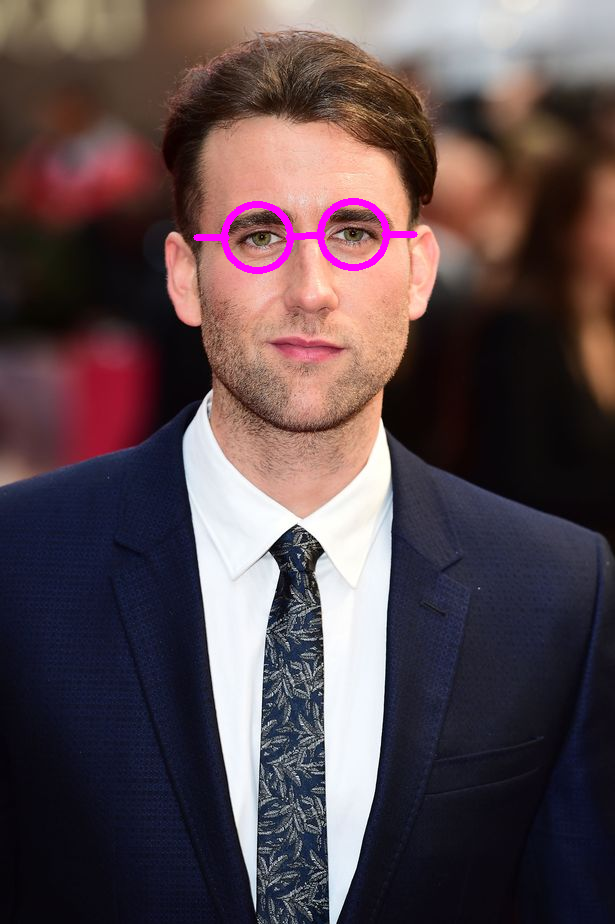

In [70]:
img = cv.imread("Images/" + currentImg.loc['file name'])
color = currentImg.loc['glasses color']
width = currentImg.loc['line width']

display(Image.fromarray(glass(img, color, width), mode='RGB'))
# plt.imshow(glass(img, color, width))